In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train = pd.read_csv('Data/train_final.csv')
test = pd.read_csv('Data/test_final.csv')

Целевая переменная: `is_canceled` — 1, если бронирование отменено, 0 — иначе.

In [28]:
print(f"Train dataset shape: {train.shape}")
print(f"Test dataset shape: {test.shape}")

Train dataset shape: (44638, 29)
Test dataset shape: (23525, 28)


In [29]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


Number of missing values in train dataset:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

- в данных пропусков нет

C:\Users\alexx\AppData\Local\Temp\ipykernel_18064\3476981611.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=y_data, palette='hls')


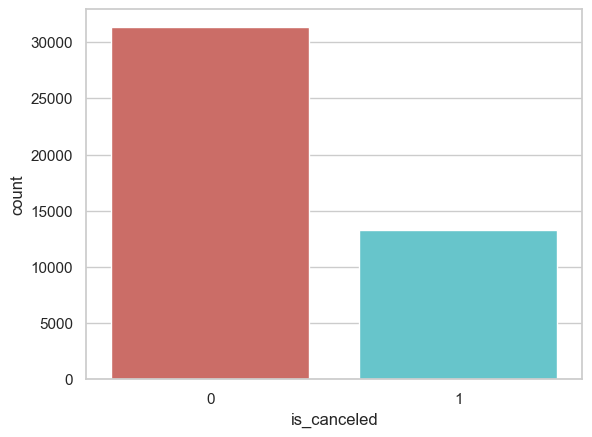

In [32]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(train['is_canceled'])
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

In [33]:
train.loc[:, train.dtypes == object] # Категориальные признаки (строковые)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,JPN,Online TA,TA/TO,D,D,No Deposit,Transient,2017-06-28
44634,Resort Hotel,September,BB,GBR,Online TA,TA/TO,E,F,No Deposit,Transient,2015-10-03
44635,City Hotel,April,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2017-02-09
44636,City Hotel,September,HB,NOR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2016-09-12


In [34]:
train = train.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])
test = test.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])

In [35]:
train['hotel'].value_counts()

City Hotel      29335
Resort Hotel    15303
Name: hotel, dtype: int64

In [36]:
train['market_segment'].value_counts()

Online TA        21325
Offline TA/TO     9085
Groups            6868
Direct            4922
Corporate         2046
Complementary      308
Aviation            84
Name: market_segment, dtype: int64

In [37]:
train['deposit_type'].value_counts()

No Deposit    40235
Non Refund     4339
Refundable       64
Name: deposit_type, dtype: int64

In [38]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Берём категориальные признаки для кодировки
categorical_columns = train.select_dtypes(include='object').columns

In [39]:
encoded_train_data = onehot_encoder.fit_transform(train[categorical_columns])
encoded_test_data = onehot_encoder.transform(test[categorical_columns])

c:\Users\alexx\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
encoded_train_df = pd.DataFrame(encoded_train_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))

In [41]:
train_data_encoded = train.drop(columns=categorical_columns).join(encoded_train_df)
test_data_encoded = test.drop(columns=categorical_columns).join(encoded_test_df)

In [48]:
train_data_encoded

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,3,2016,7,12,0,2,2,0.0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,50,2016,47,18,1,2,2,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,14,2015,37,7,1,5,2,2.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,18,2015,50,6,2,0,2,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,263,2016,40,29,2,4,2,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44633,0,31,2017,26,27,0,1,1,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
44634,0,116,2015,39,26,2,5,2,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
44635,1,89,2017,14,3,1,2,2,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
44636,0,277,2016,37,5,2,5,2,0.0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Обучение

In [49]:
X = train_data_encoded.drop(columns=['is_canceled'])
y = train_data_encoded['is_canceled']

print(f'X shape: {X.shape}')
print(f'Y shape: {y.shape}')

X shape: (44638, 54)
Y shape: (44638,)


In [50]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# обучение модели
model.fit(X, y)

# предсказание ответов для тестовой выборки
answers_pred = model.predict(X)

c:\Users\alexx\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# answers_pred - ответы которые вернула модель для X_test
# y_test - это правильные ответы для X_test
print(f'Accuracy: {accuracy_score(y, answers_pred)}')
print(f'Precision: {precision_score(y, answers_pred)}')
print(f'Recall: {recall_score(y, answers_pred)}')

Accuracy: 0.7985572830323939
Precision: 0.7791363163371487
Recall: 0.4509183980728696


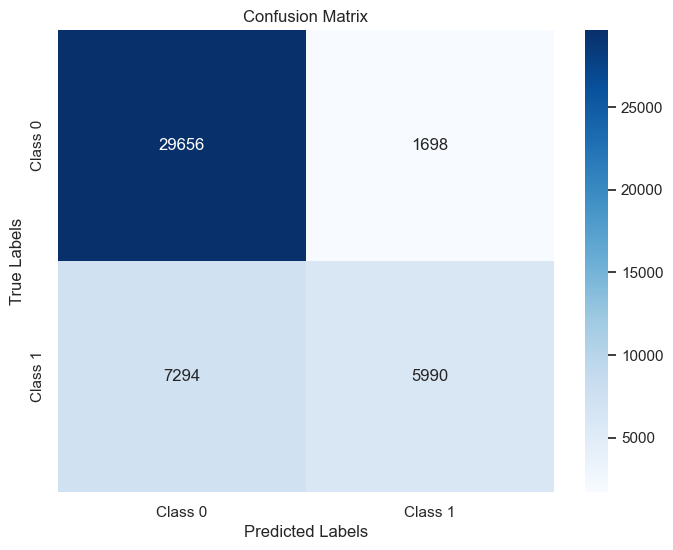

In [53]:
from sklearn.metrics import confusion_matrix

# Предсказания модели (замените model.predict на то, как ваша модель выдает предсказания)
y_pred = model.predict(X)
y_true = y  # Реальные значения меток

# Вычисление матрицы ошибок
cm = confusion_matrix(y_true, y_pred)

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

|                | Предсказано: Класс 0 | Предсказано: Класс 1 |
|----------------|----------------------|----------------------|
| **Истинный Класс 0** | True Negative (TN)     | False Positive (FP)     |
| **Истинный Класс 1** | False Negative (FN)    | True Positive (TP)      |

In [57]:
y_pred_test = model.predict(test_data_encoded)
y_pred_test

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['is_canceled'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("result.csv", index=False)